In [299]:
import pandas as pd 
import numpy as np
from scipy import stats

df=pd.read_csv('bi.csv',encoding='ISO-8859-1')
df.shape

(77, 11)

In [300]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [302]:
df=df.dropna()

In [303]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

In [304]:
Q1=np.percentile(df[['Age','entryEXAM','studyHOURS','Python','DB']],25)
Q3=np.percentile(df[['Age','entryEXAM','studyHOURS','Python','DB']],75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=[(df[['Age','entryEXAM','studyHOURS','Python','DB']] < lower_bound) | (df[['Age','entryEXAM','studyHOURS','Python','DB']] > upper_bound)]
print(outliers)

[      Age  entryEXAM  studyHOURS  Python     DB
0   False      False        True   False  False
1   False      False       False   False  False
2   False      False       False   False  False
4   False      False       False   False  False
5   False      False       False   False  False
..    ...        ...         ...     ...    ...
72  False      False       False   False  False
73  False      False        True   False  False
74  False      False        True   False  False
75  False      False        True   False  False
76  False      False       False   False  False

[75 rows x 5 columns]]


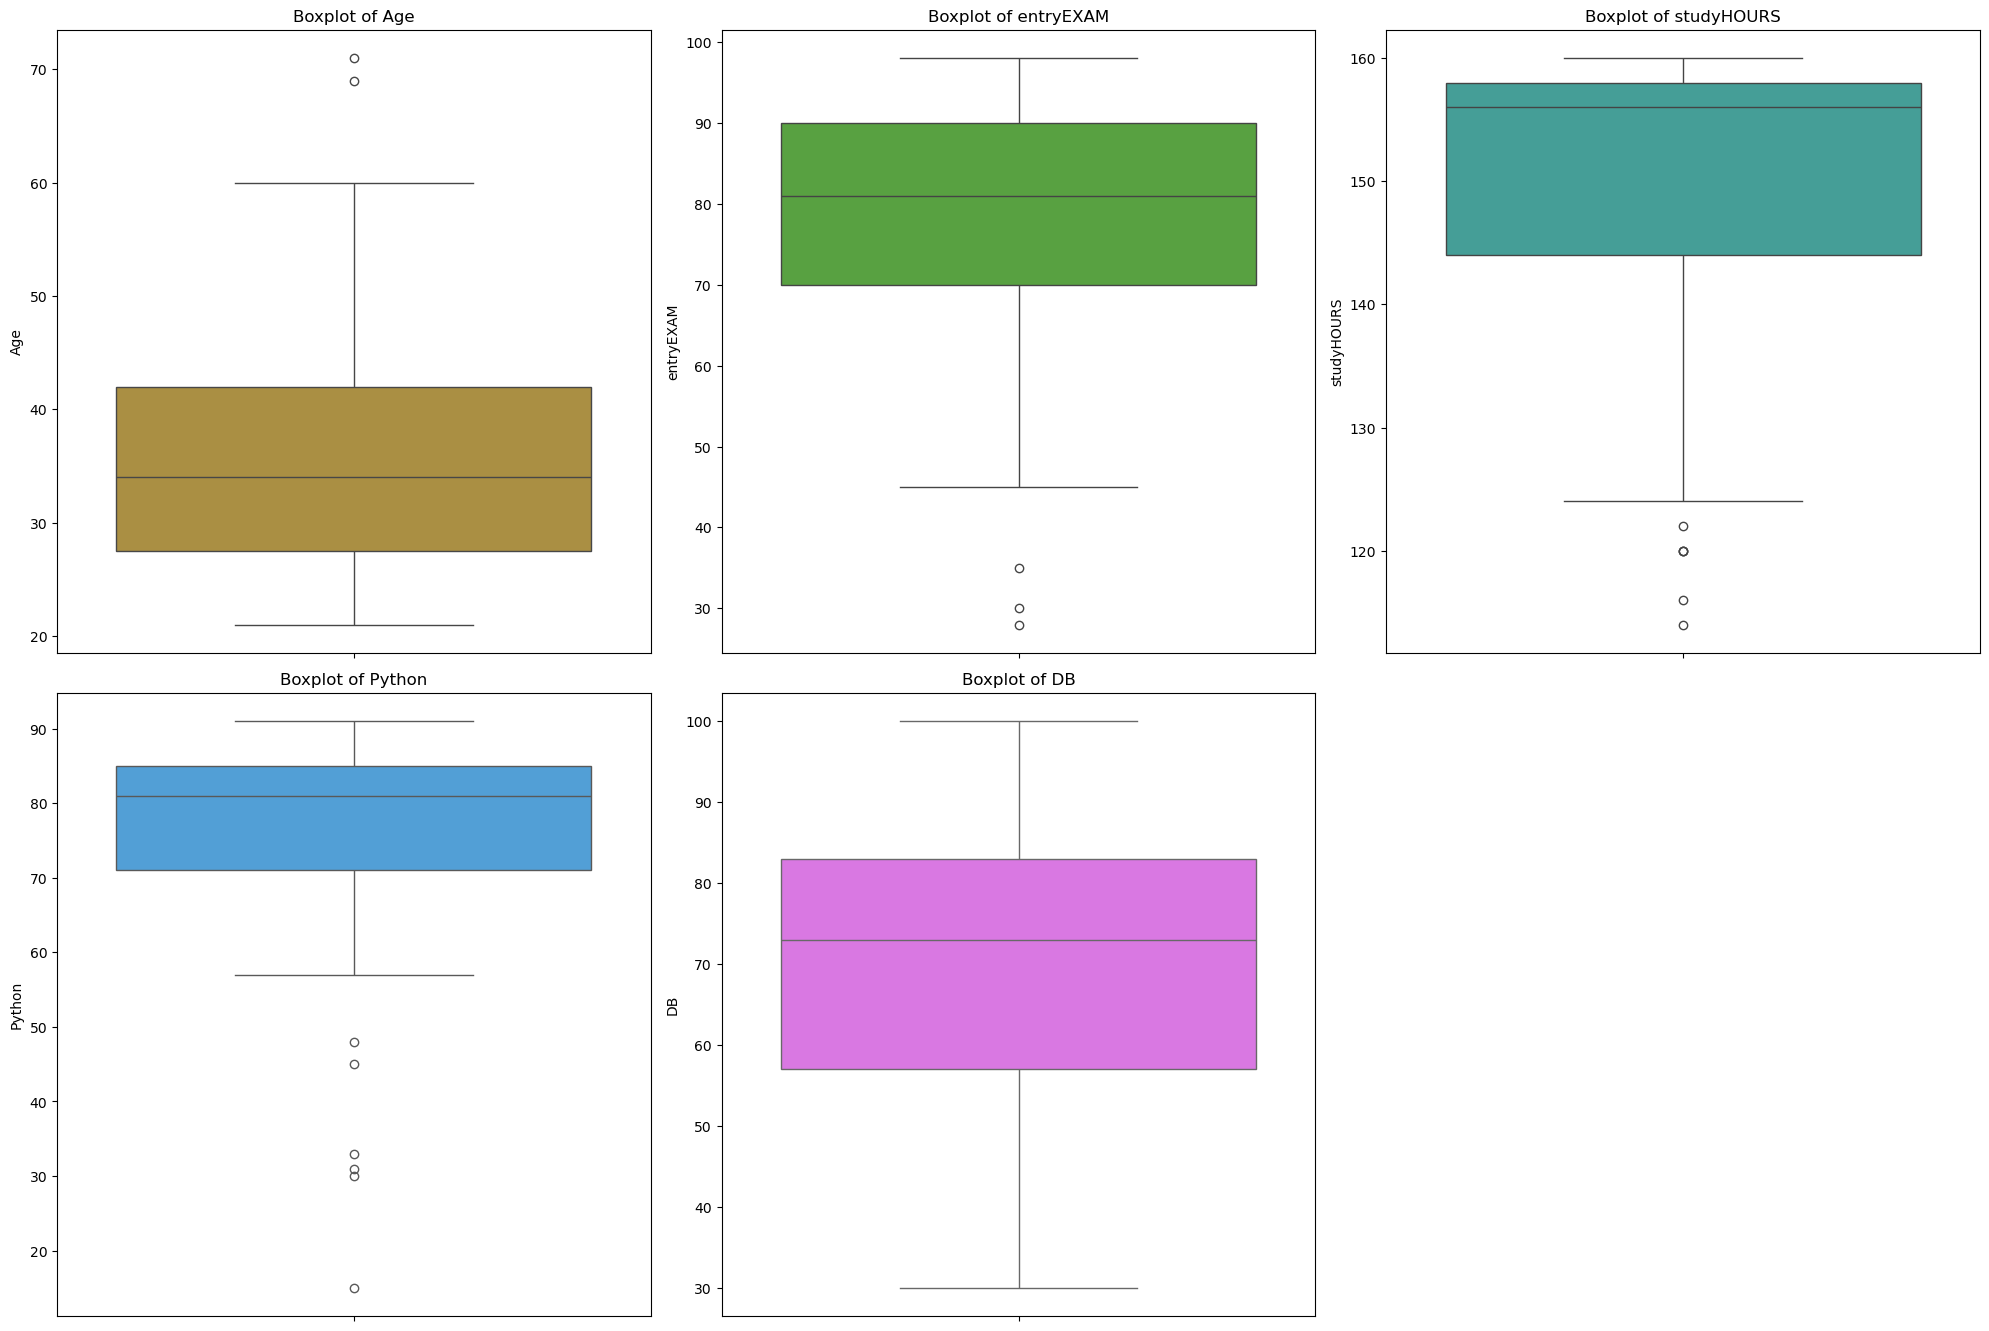

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define color palette
palette = sns.color_palette("husl")

#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df[col], color=palette[i])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()    




In [306]:
for col in df.columns:
    print(f"\nستون {col}:{df[col].unique()}\n")


ستون fNAME:['Christina' 'Alex' 'Philip' 'Maria' 'Hannah' 'Ole' 'Lars' 'Bjørn' 'Sofie'
 'Emma' 'Solveig' 'Odd' 'Grethe' 'Marco' 'Ingrid' 'Hanna' 'Jorunn'
 'Sebastian' 'Camilla' 'Prof' 'Kristine' 'Carmen' 'Gunnar' 'Gerd' 'Aisha'
 'Kato' 'Nansubuga' 'Joakim' 'Don' 'Perry' 'Line' 'Thor' 'Petter' 'Sindre'
 'Simen' 'Bjørg' 'Trond' 'Emily' 'Unni' 'Ruth' 'Inger' 'Peninah' 'Berit'
 'Jenny' 'Thea' 'Dag' 'Mwanaidi' 'Chinedu' 'Irene' 'Marianne' 'Jens'
 'Morten' 'Karoline' 'Ola' 'Tore' 'Caroline' 'Silvia' 'Valentino' 'Peter'
 'Anna' 'Lucas' 'Marie' 'Thomas' 'Maximilan' 'Clara' 'Julian' 'Sophie'
 'Leon' 'Mohammed']


ستون lNAME:['Binger' 'Walekhwa' 'Leo' 'Kedibone' 'Hansen' 'Johansen' 'Olsen' 'Larsen'
 'Jensen' 'de Vries' 'Eliassen' 'Knudsen' 'Myklebust' 'Rossi' 'Eide'
 'Andresen' 'Kristiansen' 'Mikkelsen' 'Birkeland' 'Isaksen' 'Berg'
 'Rodríguez' 'Ahmed' 'Brekke' 'Bakken' 'Nakaweesi' 'Muwanguzi' 'Nakalema'
 'Edvardsen' 'Pettersen' 'Rønning' 'Næss' 'Sandvik' 'Ellingsen' 'Myhre'
 'Fredriksen' 'Karls

In [307]:
df['gender'] = df['gender'].replace({'M': 'Male','F': 'Female'})
df['gender'] = df['gender'].replace({'male': 'Male','female': 'Female'})
df['residence'] = df['residence'].str.replace(r'[\s\-_]', '', regex=True)
df['prevEducation'] = df['prevEducation'].replace({'Diplomaaa': 'Diploma','Barrrchelors':'Bachelors'})
df['prevEducation'] = df['prevEducation'].str.replace(r'(?i)^Highschool$', 'High School', regex=True)
# Alignment of letters
df['country'] = df['country'].str.strip().str.title() 
df['residence'] = df['residence'].str.strip().str.title() 
df['prevEducation'] = df['prevEducation'].str.strip().str.title() 

df.sample(4)

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
13,Grethe,Myklebust,40,Female,Norway,Private,77,Diploma,144,70.0,76
50,Dag,Arnesen,30,Male,Norway,Biresidence,95,Diploma,160,90.0,89
31,Don,Pettersen,46,Male,Norway,Private,76,Diploma,156,85.0,45
14,Marco,Rossi,42,Male,Italy,Private,80,Bachelors,152,75.0,77


In [308]:
#EDA

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,75.0,35.546667,10.264467,21.0,27.5,34.0,42.0,71.0
entryEXAM,75.0,77.360000,16.097373,28.0,70.0,81.0,90.0,98.0
studyHOURS,75.0,150.080000,12.435520,114.0,144.0,156.0,158.0,160.0
Python,75.0,75.853333,15.410328,15.0,71.0,81.0,85.0,91.0
DB,75.0,69.800000,17.003179,30.0,57.0,73.0,83.0,100.0


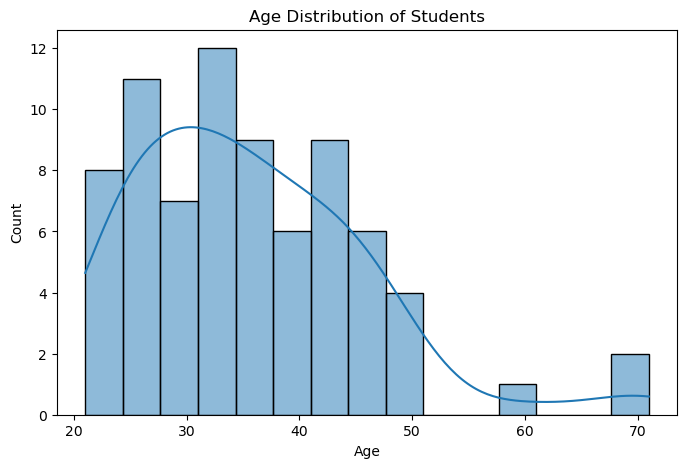

In [309]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution of Students")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

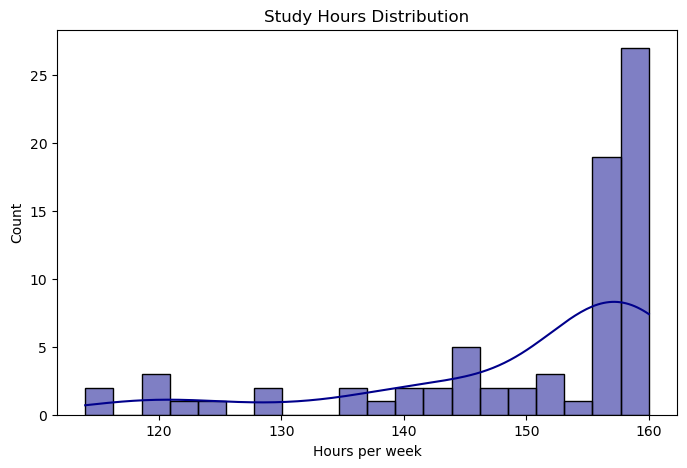

In [310]:
plt.figure(figsize=(8,5))
sns.histplot(df['studyHOURS'], bins=20, kde=True, color="darkblue")
plt.title("Study Hours Distribution")
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25068\3968698729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col , palette='viridis')


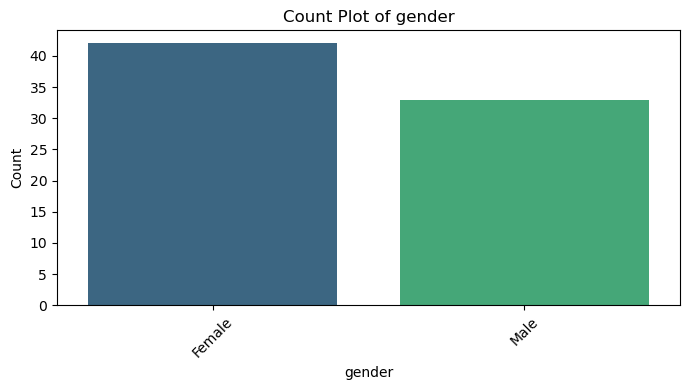

C:\Users\User\AppData\Local\Temp\ipykernel_25068\3968698729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col , palette='viridis')


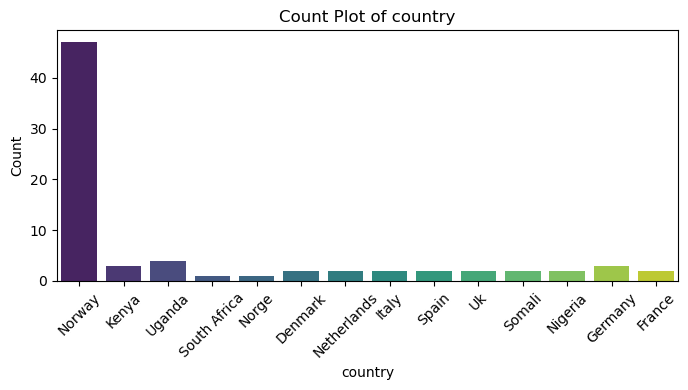

C:\Users\User\AppData\Local\Temp\ipykernel_25068\3968698729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col , palette='viridis')


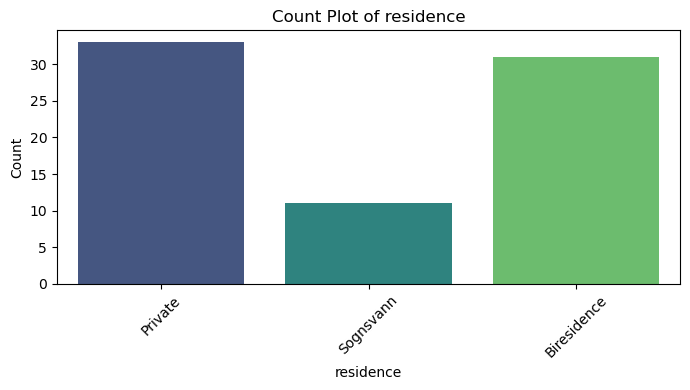

C:\Users\User\AppData\Local\Temp\ipykernel_25068\3968698729.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col , palette='viridis')


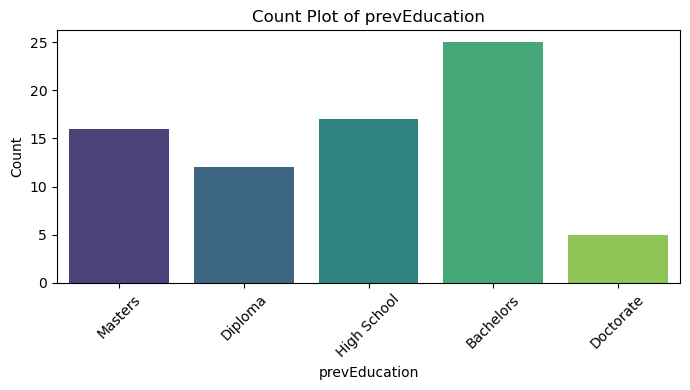

In [311]:
categorical_cols = ['gender', 'country', 'residence', 'prevEducation']
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(data=df,x=col , palette='viridis')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

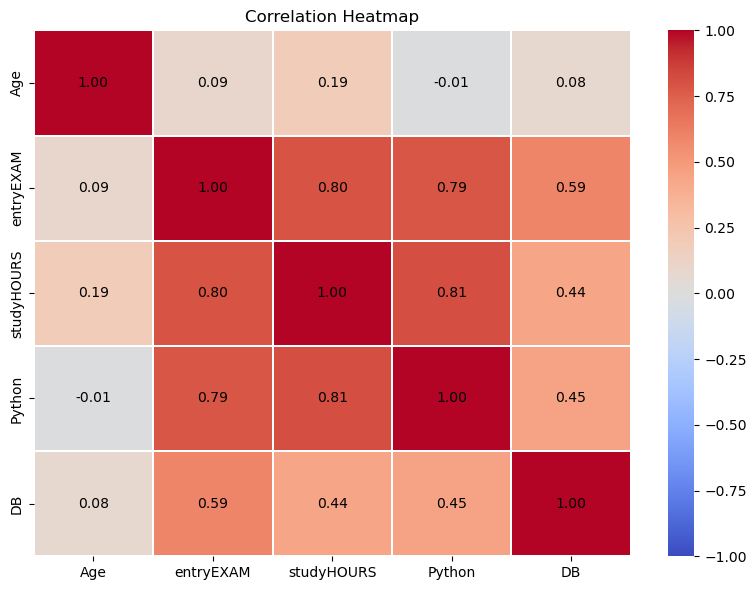

In [312]:
# Correlation Heatmap - ensure at least 2 numeric columns are available
numerical_columns=df[df.select_dtypes(include=['int64', 'float64']).columns]

if numerical_columns.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    corr = numerical_columns.corr()
    sns.heatmap(corr, cmap='coolwarm', fmt='.2f',annot_kws={'color': 'black'}, vmin=-1, vmax=1, linewidths=0.2, annot=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

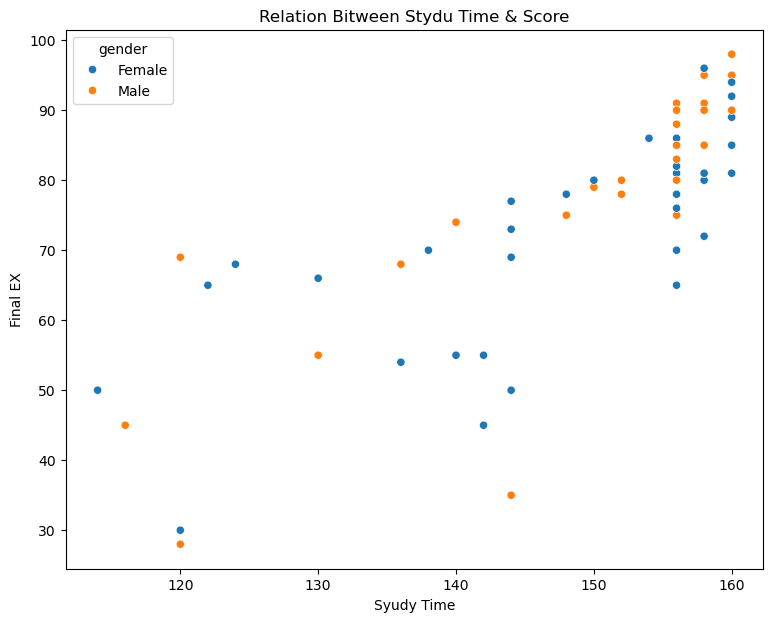

In [313]:
df['studyHOURS']=df['studyHOURS'].astype(int)

plt.figure(figsize=(9,7))
sns.scatterplot(x='studyHOURS',y='entryEXAM',hue='gender',data=df )
plt.title('Relation Bitween Stydu Time & Score')
plt.xlabel('Syudy Time')
plt.ylabel('Final EX')
plt.show()

In [314]:
#Feature Engineering
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender_code'] = le.fit_transform(df['gender'])
df['contry_code']=le.fit_transform(df['country'])
df['prevEducation_code']=le.fit_transform(df['prevEducation'])

#Creat Binery Column
df["Pass_Python"] = (df["Python"] >= 50).astype(int)

df.sample(6)

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,gender_code,contry_code,prevEducation_code,Pass_Python
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43,0,1,0,1
16,Hanna,Andresen,45,Female,Norway,Private,85,Bachelors,156,87.0,82,0,8,0,1
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74,1,2,4,1
47,Berit,Eide,24,Female,Norway,Biresidence,54,High School,136,57.0,50,0,8,3,1
55,Chinedu,Okafor,69,Male,Nigeria,Private,94,Doctorate,160,87.0,88,1,6,2,1
60,Ola,Bakke,50,Female,Norway,Private,81,Bachelors,158,87.0,46,0,8,0,1


In [315]:
#Standardize numerical features (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df['Python_Standardize']=scaler.fit_transform(df[['Python']])
df['entryEXAM_Standardize']=scaler.fit_transform(df[['entryEXAM']])
df['studyHOURS_Standardize']=scaler.fit_transform(df[['studyHOURS']])
df['DB_Standardize']=scaler.fit_transform(df[['DB']])
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,gender_code,contry_code,prevEducation_code,Pass_Python,Python_Standardize,entryEXAM_Standardize,studyHOURS_Standardize,DB_Standardize
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,0,8,4,1,-1.101004,-0.335216,0.641174,-0.876287
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,1,4,1,1,-1.035675,0.102566,-0.006477,0.307885
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50,1,12,3,1,-0.121076,-1.398401,-1.625603,-1.172330
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80,0,10,3,1,0.989509,-0.772998,-2.273254,0.603928
5,Hannah,Hansen,25,Female,Norge,Biresidence,66,High School,130,88.0,59,0,7,3,1,0.793524,-0.710458,-1.625603,-0.639453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43,0,1,0,1,-0.055747,0.165106,-0.006477,-1.586790
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83,1,0,4,1,0.532210,0.790509,0.641174,0.781553
74,Sophie,Brown,33,Female,Uk,Sognsvann,96,Masters,158,85.0,90,0,13,4,1,0.597538,1.165751,0.641174,1.196013
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74,1,2,4,1,0.728195,0.790509,0.803087,0.248676


In [316]:
#Modeling 
from sklearn.model_selection import train_test_split


X = df[['studyHOURS', 'entryEXAM', 'Python', 'contry_code', 'gender_code']]
y = df['DB']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train Shape :',X_train.shape)
print('Test  Shape :',X_test.shape)


Train Shape : (52, 5)
Test  Shape : (23, 5)


R2 Score: 0.4617549125801098


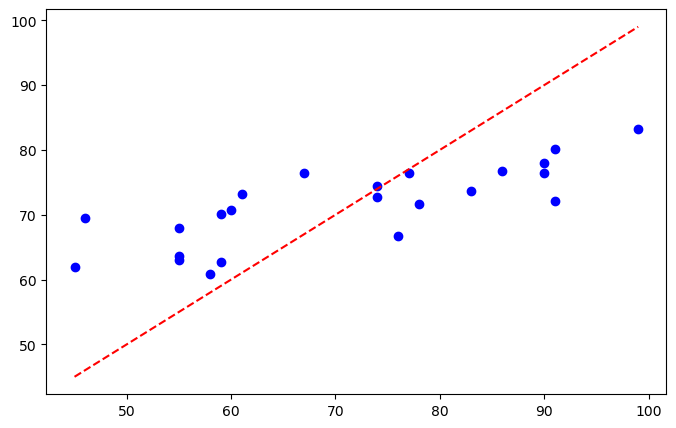

In [317]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)



print("R2 Score:", r2_score(y_test, y_pred))


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

p value